In [69]:
def f(x):
    return 3*x+5

In [70]:
start = -2
stop = 2
step = 0.01
x = [start + i*step for i in range(int((stop-start)/step))]

In [71]:
import random
y = [f(i) for i in x]

In [72]:
len(x)

400

In [66]:
data = list(zip(x, y))

In [65]:
from micrograd.engine import Value

In [68]:
a = 1; b= 2
a, b = [Value(a), Value(b)]
for i in range(10000):
    loss = None
    
    for item in data:
        x_, y_ = item
        x_ = Value(x_)
        y_ = Value(y_)
        y_pred = a * x_ + b
        #print('pred:', y_pred.data, 'y', y.data)
        if not loss:
            loss = (y_ - y_pred)**2
        else:
            loss += (y_ - y_pred)**2
    loss = loss/len(data)
    loss.backward()
    a.data = a.data - 0.1 * a.grad
    b.data = b.data - 0.1 * b.grad
    a.grad = 0
    b.grad = 0
    print(a.data, b.data, loss.data)


1.5303400000000003 2.598 14.273400000000004
1.9198522322000002 3.07693034 8.61420611927526
2.205972167779226 3.4604641242322 5.233069968904555
2.416176033921772 3.7675772715535394 3.198597141893773
2.570631948227407 4.013477993276753 1.966143514336158
2.684145004586881 4.21035302656963 1.2148021638880737
2.7675844092402673 4.36796656626029 0.7540690368122331
2.8289306413944257 4.494140837417472 0.4700208931803572
2.874043848091192 4.5951416005753725 0.2940482440275399
2.907227716721289 4.675987324308389 0.18455391354484607
2.9316432888275314 4.740697087163433 0.11615935888942168
2.949612670083057 4.792489313019574 0.07329101415609329
2.962841948665028 4.833941063085742 0.04634134578622215
2.9725848272776108 4.867115692417259 0.029354850314764768
2.9797627470799077 4.893665138761085 0.018623943526359325
2.9850530804548696 4.914911873755948 0.011831652159997342
2.9889538873637256 4.931914552085213 0.007525155435976504
2.991831468772526 4.945520595555534 0.004790798261932682
2.99395529159

In [1]:
def f(x):
    return 3*x**2-9*x+7

In [2]:
start = -2
stop = 2
step = 0.01
x = [start + i*step for i in range(int((stop-start)/step))]

In [3]:
import random
y = [f(i) + 0.25*random.random() for i in x]

In [4]:
data = list(zip(x, y))

In [5]:
data[:10]

[(-2.0, 37.047952814909635),
 (-1.99, 36.79717907830531),
 (-1.98, 36.781517833985866),
 (-1.97, 36.59616180703847),
 (-1.96, 36.24063465152316),
 (-1.95, 36.06434971337654),
 (-1.94, 35.80394272933131),
 (-1.93, 35.77900017851646),
 (-1.92, 35.5528055633343),
 (-1.91, 35.33611034562943)]

In [6]:
from micrograd.engine import Value

In [35]:
a = 1; b= 2; c = 0.5; d=0.2; e = 0.5; f = -0.2; g = 0.1
a, b, c,d, e,f, g = [Value(a), Value(b), Value(c),Value(d),Value(e),Value(f), Value(g)]

for i in range(20000):
    loss = None
    
    for item in data:
        x_, y_ = item
        x_ = Value(x_)
        y_ = Value(y_)
        
        #
        r1 = (a*x_+b).relu()
        r2 = (c*x_+d).relu()
        y_pred = r1*e + r2*f + g
        
        #print('pred:', y_pred.data, 'y', y.data)
        if not loss:
            loss = (y_ - y_pred)**2
        else:
            loss += (y_ - y_pred)**2
    loss = loss/len(data)
    loss.backward()
    a.data = a.data - 0.03 * a.grad
    b.data = b.data - 0.03 * b.grad
    c.data = c.data - 0.03 * c.grad
    d.data = d.data - 0.03 * d.grad
    e.data = e.data - 0.03 * e.grad
    f.data = f.data - 0.03 * f.grad
    g.data = g.data - 0.03 * g.grad
    a.grad = 0
    b.grad = 0
    c.grad = 0
    d.grad = 0
    e.grad = 0
    f.grad = 0
    g.grad = 0
    
    if i%100==0:
        print(i, a.data, b.data, c.data, d.data, e.data, f.data, g.data, loss.data)

0 0.6255461017609965 2.301642916644565 0.5049126134518047 0.18608952643812707 0.9576638701002529 -0.1983710600676389 0.7088280262113662 235.3219382419947
100 -4.009866805332169 1.5338123037958622 0.2851629880099306 0.5504781095844254 3.4257283436481125 -0.37605161668615 1.5537179159417533 1.3940130637354733
200 -4.0189696244902 1.492627562039447 0.31720132969405973 0.6092196703072938 3.418190498136149 -0.4784298730505963 1.7377324654656021 1.376412557230246
300 -4.021874691540334 1.4633134360390458 0.3549447853999008 0.6815085130616079 3.40891740949834 -0.5895953040647341 1.924188042058461 1.3578216745163336
400 -4.017578048809867 1.446884749836404 0.39327687891181273 0.7561913428387153 3.3968166805032936 -0.6954942952147664 2.121581029422153 1.3385947078582097
500 -4.020078578927405 1.4144301342968866 0.429540751512782 0.8249904925556285 3.386086448691597 -0.7888968996890645 2.335368843596597 1.3177623723154832
600 -4.022049826597356 1.3823229665535395 0.4621668175737525 0.89172265918

In [12]:
a = 1; b= 2
a, b = [Value(a), Value(b)]
for i in range(5000):
    loss = None
    
    for item in data:
        x_, y_ = item
        x_ = Value(x_)
        y_ = Value(y_)
        y_pred = a * x_ + b
        #print('pred:', y_pred.data, 'y', y.data)
        if not loss:
            loss = (y_ - y_pred)**2
        else:
            loss += (y_ - y_pred)**2
    loss = loss/len(data)
    loss.backward()
    a.data = a.data - 0.01 * a.grad
    b.data = b.data - 0.01 * b.grad
    a.grad = 0
    b.grad = 0
    if i%10==0:
        print(a.data, b.data, loss.data)


0.7317097525591731 2.1835586754037886 231.0779208281458
-1.5866803106753544 3.8275917832925805 146.7919434238929
-3.3546496682678266 5.169012308861219 95.42187998053637
-4.70280555672219 6.263621323536124 63.98044891672425
-5.730776860685685 7.156906766728476 44.65180135110903
-6.5145594153359045 7.8859550458615315 32.715700455786134
-7.1121200897391725 8.481007013480804 25.310723630826438
-7.567672331862692 8.966724782506658 20.695363598265878
-7.914938062224864 9.363223349451678 17.80528322703048
-8.179636181187297 9.68691086825407 15.987174780069711
-8.381381014689989 9.951173203083956 14.838227367110997
-8.535130575480235 10.166931722846119 14.108939220335934
-8.652291364760124 10.343097888928042 13.644049554753524
-8.741561143230017 10.486943793225652 13.346490860888041
-8.80957179924435 10.604404233294238 13.155295495121315
-8.861379714763746 10.700323009978042 13.031994588814582
-8.900839793075251 10.778653774048635 12.95220679885738
-8.930890738768763 10.842623830137777 12.9004

In [13]:
import matplotlib.pyplot as plt

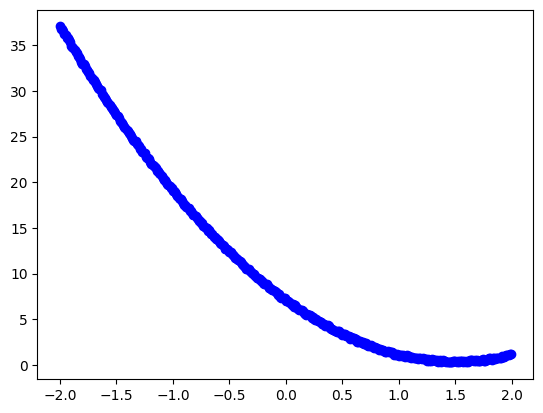

In [14]:
plt.scatter(x, y, c='blue', label='Scatter Data')

In [20]:
def f(x):
    return 3*x**2-9*x+7

In [21]:
y_func = [f(i) for i in x]

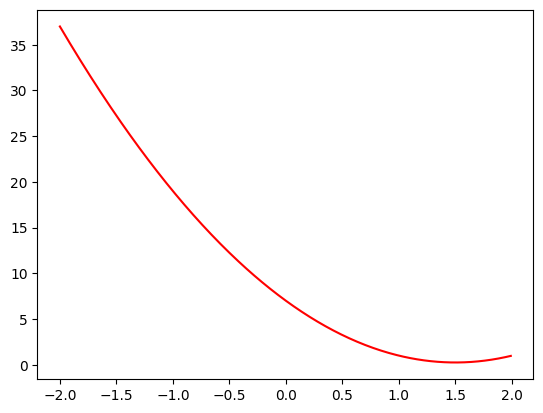

In [22]:
plt.plot(x, y_func, c='red', label='f(x) = x^2')

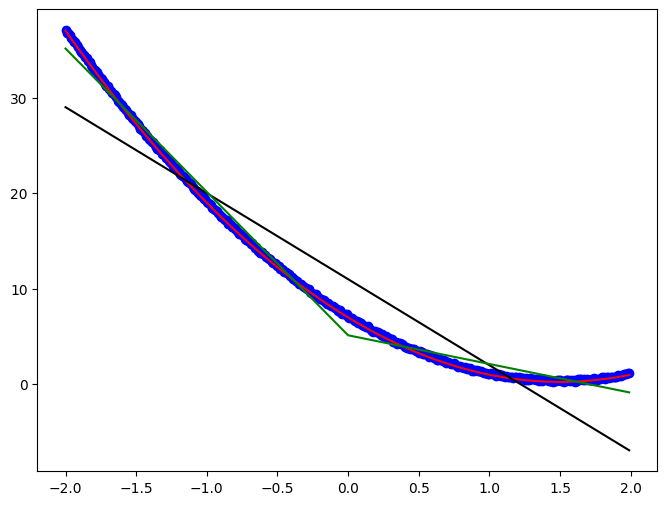

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue')
plt.plot(x, y_func, c='red')
plt.plot(x, y_linear, c='black')
plt.plot(x, yl, c='green')

In [26]:
y_linear = [-9*i+11 for i in x]

In [36]:
def relu(x):
    if x >0:
        return x
    return 0

In [37]:
def fl(x):
    r1 = relu(-3.975962627029394*x+0.00018963519985846965)
    r2 = relu(1.1698309307590629*x+2.339709778143919)
    return r1*3.018640848608191 + r2*-2.566874799743892 + 11.132367532117636

In [38]:
x[:10]

[-2.0, -1.99, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93, -1.92, -1.91]

In [40]:
yl = [fl(i) for i in x]

In [41]:
yl[:10]

[35.13682337367995,
 34.98677524633378,
 34.83672711898761,
 34.68667899164144,
 34.536630864295276,
 34.38658273694911,
 34.23653460960294,
 34.08648648225677,
 33.9364383549106,
 33.78639022756443]